In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
anemia_pres = pd.read_csv('../data/messy/anemia_preescolar5_N2012U.csv', index_col=False)
anemia_pres.ANEMIA.value_counts()

0.0    5841
1.0    1729
Name: ANEMIA, dtype: int64

In [3]:
anemia_child = pd.read_csv('../data/messy/anemia_escolar5_11_N2012.csv', index_col=False,encoding='latin-1')
anemia_child.ANEMIA.value_counts()

0.0    12404
1.0     1462
Name: ANEMIA, dtype: int64

In [4]:
anemia_teen = pd.read_csv('../data/messy/anemia_adolescente12_19_N2012.csv', index_col=False,encoding='latin-1')
anemia_teen.ANEMIA.value_counts()

0.0    10908
1.0      730
Name: ANEMIA, dtype: int64

In [5]:
anemia_gen = pd.concat([anemia_child, anemia_pres])
anemia_gen = pd.concat([anemia_gen, anemia_teen])
#anemia_gen.to_csv('../data/clean/full_data.csv', index=False)
anemia_gen.shape

/home/cyborx/anaconda3/envs/biopython/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(38098, 34)

In [6]:
anemia_gen.ANEMIA.value_counts()

0.0    29153
1.0     3921
Name: ANEMIA, dtype: int64

In [7]:
anemia_gen.isnull().mean()*100

AFILIACI     0.000000
AGEB         0.000000
ALTITUD      0.041997
ANEMIA      13.187044
AREA         0.000000
CODE_UPM    12.693580
EDAD         0.000000
EDADDIAS     0.000000
EDOFISIO    81.132868
ENTIDAD      0.000000
EST_DIS     12.693580
EST_MARG    12.693580
EST_URB     12.693580
EST_VAR     12.693580
FECHA_NA     0.498714
FECHA_VI     0.000000
FOLIO_C      0.000000
HB          12.693580
HBAJUSTA    13.187044
HEMCAP       7.173605
INDICEF      0.000000
INTP         0.000000
LOCALI       0.000000
MESES        0.000000
MUNICI       0.000000
NOM_ENT      0.041997
NOM_LOC      0.041997
NOM_MUN      0.041997
NSEDECIL     0.000000
NSEQUINT     0.000000
NSETERCI     0.000000
PONDEF      12.693580
REGION       0.000000
SEXO         0.000000
dtype: float64

In [8]:
anemia_gen = anemia_gen[np.isfinite(anemia_gen['ANEMIA'])]

In [9]:
anemia_gen.isnull().mean()

AFILIACI    0.000000
AGEB        0.000000
ALTITUD     0.000000
ANEMIA      0.000000
AREA        0.000000
CODE_UPM    0.000000
EDAD        0.000000
EDADDIAS    0.000000
EDOFISIO    0.823245
ENTIDAD     0.000000
EST_DIS     0.000000
EST_MARG    0.000000
EST_URB     0.000000
EST_VAR     0.000000
FECHA_NA    0.004263
FECHA_VI    0.000000
FOLIO_C     0.000000
HB          0.000000
HBAJUSTA    0.000000
HEMCAP      0.000000
INDICEF     0.000000
INTP        0.000000
LOCALI      0.000000
MESES       0.000000
MUNICI      0.000000
NOM_ENT     0.000000
NOM_LOC     0.000000
NOM_MUN     0.000000
NSEDECIL    0.000000
NSEQUINT    0.000000
NSETERCI    0.000000
PONDEF      0.000000
REGION      0.000000
SEXO        0.000000
dtype: float64

In [10]:
anemia_gen.ANEMIA.value_counts()

0.0    29153
1.0     3921
Name: ANEMIA, dtype: int64

In [11]:
anemia_gen.to_csv('../data/clean/anemia_gen_notclean.csv', index=False)
target_count = anemia_gen.ANEMIA.value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Proportion: 7.44 : 1


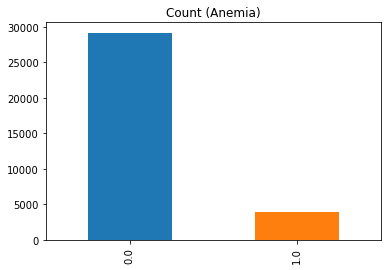

In [12]:
target_count.plot(kind='bar', title='Count (Anemia)');

## Random under-sampling

Random under-sampling:
1.0    3921
0.0    3921
Name: ANEMIA, dtype: int64


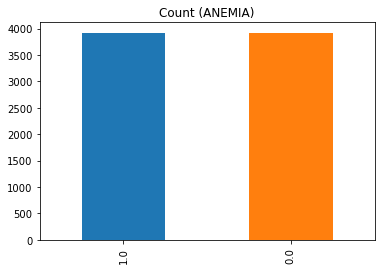

In [13]:
count_class_0, count_class_1 = anemia_gen.ANEMIA.value_counts()

# Divide by class
df_class_0 = anemia_gen[anemia_gen['ANEMIA'] == 0]
df_class_1 = anemia_gen[anemia_gen['ANEMIA'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.ANEMIA.value_counts())

df_test_under.ANEMIA.value_counts().plot(kind='bar', title='Count (ANEMIA)');

In [14]:
df_test_under.head()

,AFILIACI,AGEB,ALTITUD,ANEMIA,AREA,CODE_UPM,EDAD,EDADDIAS,EDOFISIO,ENTIDAD,...,MUNICI,NOM_ENT,NOM_LOC,NOM_MUN,NSEDECIL,NSEQUINT,NSETERCI,PONDEF,REGION,SEXO
5779,1,0698,40.0,0.0,1,M2635,1.448323,529.0,NaN,26,...,42,Sonora,Navojoa,Navojoa,7,4,2,1143.290,1,2
5516,6,2025,1400.0,0.0,2,M0827,9.774127,3570.0,NaN,8,...,36,Chihuahua,El Triunfo,Jiménez,4,2,2,281.149,1,1
5400,0,31,2587.0,0.0,2,M1309,12.766598,4663.0,0.0,13,...,16,Hidalgo,Las ï¿½nimas,Cuautepec de Hinojosa,8,4,3,704.133,4,2
10199,6,233,1.0,0.0,2,M2340,13.574264,4958.0,0.0,23,...,7,Quintana Roo,Holbox,Lï¿½zaro Cï¿½rdenas,8,4,3,140.381,4,2
109,0,2210,1885.0,0.0,1,M0116,19.126625,6986.0,NaN,1,...,1,Aguascalientes,Aguascalientes,Aguascalientes,5,3,2,176.596,2,1


In [15]:
df_test_under.to_csv('../data/clean/anemia_balanced_pres.csv', index=False)

In [16]:
anemia_balanced_pres = pd.read_csv('../data/clean/anemia_balanced_pres.csv', index_col=False)

In [17]:
anemia_balanced_pres.head()

,AFILIACI,AGEB,ALTITUD,ANEMIA,AREA,CODE_UPM,EDAD,EDADDIAS,EDOFISIO,ENTIDAD,...,MUNICI,NOM_ENT,NOM_LOC,NOM_MUN,NSEDECIL,NSEQUINT,NSETERCI,PONDEF,REGION,SEXO
0,1,0698,40.0,0.0,1,M2635,1.448323,529.0,NaN,26,...,42,Sonora,Navojoa,Navojoa,7,4,2,1143.290,1,2
1,6,2025,1400.0,0.0,2,M0827,9.774127,3570.0,NaN,8,...,36,Chihuahua,El Triunfo,Jiménez,4,2,2,281.149,1,1
2,0,31,2587.0,0.0,2,M1309,12.766598,4663.0,0.0,13,...,16,Hidalgo,Las ï¿½nimas,Cuautepec de Hinojosa,8,4,3,704.133,4,2
3,6,233,1.0,0.0,2,M2340,13.574264,4958.0,0.0,23,...,7,Quintana Roo,Holbox,Lï¿½zaro Cï¿½rdenas,8,4,3,140.381,4,2
4,0,2210,1885.0,0.0,1,M0116,19.126625,6986.0,NaN,1,...,1,Aguascalientes,Aguascalientes,Aguascalientes,5,3,2,176.596,2,1


In [18]:
anemia_balanced_pres.tail()

,AFILIACI,AGEB,ALTITUD,ANEMIA,AREA,CODE_UPM,EDAD,EDADDIAS,EDOFISIO,ENTIDAD,...,MUNICI,NOM_ENT,NOM_LOC,NOM_MUN,NSEDECIL,NSEQUINT,NSETERCI,PONDEF,REGION,SEXO
7837,6,116,2389.0,1.0,2,M3230,17.330595,6330.0,0.0,32,...,38,Zacatecas,El Chiquihuitillo,Pinos,3,2,1,965.969,2,2
7838,6,135,2139.0,1.0,2,M3231,12.881587,4705.0,0.0,32,...,38,Zacatecas,Huertas del Mezquite,Pinos,4,2,2,243.837,2,2
7839,6,60,1843.0,1.0,2,M3236,18.822724,6875.0,0.0,32,...,41,Zacatecas,Clavellinas,El Salvador,2,1,1,136.947,2,2
7840,1,146,1697.0,1.0,1,M3240,13.311430,4862.0,0.0,32,...,48,Zacatecas,Tlaltenango de Sï¿½nchez Romï¿½n,Tlaltenango de Sï¿½nchez Romï¿½n,9,5,3,478.898,2,2
7841,1,125,2533.0,1.0,2,M3241,19.572895,7149.0,0.0,32,...,50,Zacatecas,Vetagrande,Vetagrande,9,5,3,503.661,2,2


In [19]:
anemia_balanced_pres.isnull().mean()

AFILIACI    0.000000
AGEB        0.000000
ALTITUD     0.000000
ANEMIA      0.000000
AREA        0.000000
CODE_UPM    0.000000
EDAD        0.000000
EDADDIAS    0.000000
EDOFISIO    0.842642
ENTIDAD     0.000000
EST_DIS     0.000000
EST_MARG    0.000000
EST_URB     0.000000
EST_VAR     0.000000
FECHA_NA    0.002423
FECHA_VI    0.000000
FOLIO_C     0.000000
HB          0.000000
HBAJUSTA    0.000000
HEMCAP      0.000000
INDICEF     0.000000
INTP        0.000000
LOCALI      0.000000
MESES       0.000000
MUNICI      0.000000
NOM_ENT     0.000000
NOM_LOC     0.000000
NOM_MUN     0.000000
NSEDECIL    0.000000
NSEQUINT    0.000000
NSETERCI    0.000000
PONDEF      0.000000
REGION      0.000000
SEXO        0.000000
dtype: float64